In [1]:
text = "This is my test text. We're keeping this text short to keep things manageable."

In [2]:
def count_words(text):
    '''
    Count the number of times each word occurs in text (str). Return dictionary where keys are unique words and values are word counts. Skip punctuation.
    '''

    text = text.lower()
    skips = [".", ",", ";", ":", "'", '"']

    for ch in skips:
        text = text.replace(ch, "")

    word_counts = {}
    for word in text.split(" "):
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1
    
    return word_counts

In [3]:
count_words(text)

{'this': 2,
 'is': 1,
 'my': 1,
 'test': 1,
 'text': 2,
 'were': 1,
 'keeping': 1,
 'short': 1,
 'to': 1,
 'keep': 1,
 'things': 1,
 'manageable': 1}

In [4]:
from collections import Counter

def count_words_fast(text):
    text = text.lower()
    skips = [".", ",", ";", ":", "'", '"']

    for ch in skips:
        text = text.replace(ch, "")

    word_counts = Counter(text.split())
    
    return word_counts

In [5]:
count_words_fast(text) == count_words(text)

True

In [6]:
len(count_words("This comprehension check is to check for comprehension."))

6

In [7]:
count_words(text) is count_words_fast(text)

False

In [8]:
def read_book(title_path):
    """
    Read a book and return it as a string.
    """
    with open(title_path, "r", encoding="utf8") as current_file:
        text = current_file.read()
        text = text.replace("\n", "").replace("\r", "")
    
    return text

In [9]:
text = read_book("./Books/English/shakespeare/Romeo and Juliet.txt")
len(text)

169275

In [10]:
ind = text.find("What's in a name?")
ind

42757

In [11]:
sample_text = text[ind:ind+1000]
sample_text

"What's in a name? That which we call a rose    By any other name would smell as sweet.    So Romeo would, were he not Romeo call'd,    Retain that dear perfection which he owes    Without that title. Romeo, doff thy name;    And for that name, which is no part of thee,    Take all myself.  Rom. I take thee at thy word.    Call me but love, and I'll be new baptiz'd;    Henceforth I never will be Romeo.  Jul. What man art thou that, thus bescreen'd in night,    So stumblest on my counsel?  Rom. By a name    I know not how to tell thee who I am.    My name, dear saint, is hateful to myself,    Because it is an enemy to thee.    Had I it written, I would tear the word.  Jul. My ears have yet not drunk a hundred words    Of that tongue's utterance, yet I know the sound.    Art thou not Romeo, and a Montague?  Rom. Neither, fair saint, if either thee dislike.  Jul. How cam'st thou hither, tell me, and wherefore?    The orchard walls are high and hard to climb,    And the place death, consid

In [12]:
def words_stats(word_counts):
    num_unique = len(word_counts)
    counts = word_counts.values()

    return (num_unique, counts)

In [13]:
text = read_book("./Books/English/shakespeare/Romeo and Juliet.txt")
word_counts = count_words(text)
(num_unique, counts) = words_stats(word_counts)
print(num_unique)

text = read_book("./Books/German/shakespeare/Romeo und Julia.txt")
word_counts = count_words(text)
(num_unique, counts) = words_stats(word_counts)
print(num_unique)

5118
7527


In [14]:
import os
book_dir = "./Books"

In [15]:
import pandas as pd

In [16]:
stats = pd.DataFrame(columns=("language", "author", "title", "length", "unique"))

title_num = 1
for language in os.listdir(book_dir):
    for author in os.listdir(book_dir + "/" + language):
        for title in os.listdir(book_dir + "/" + language + "/" + author):
            inputFile = book_dir + "/" + language + "/" + author + "/" + title
            print(inputFile)
            text = read_book(inputFile)
            (num_unique, counts) = words_stats(count_words(text))
            stats.loc[title_num] = language, author.capitalize(), title.replace(".txt", ""), sum(counts), num_unique
            title_num += 1

./Books/German/schiller/Wallensteins Lager.txt
./Books/German/schiller/die braut von messina.txt
./Books/German/schiller/Der Parasit, oder die Kunst, sein GlÅck zu machen.txt
./Books/German/schiller/Die Verschwîrung des Fiesco zu Genua.txt
./Books/German/schiller/Kabale und Liebe.txt
./Books/German/schiller/Die Huldigung der KÅnste.txt
./Books/German/schiller/Der Neffe als Onkel.txt
./Books/German/schiller/Die Piccolomini.txt
./Books/German/schiller/Die Jungfrau von Orleans.txt
./Books/German/schiller/Turandot, Prinzessin von China.txt
./Books/German/schiller/Wallensteins Tod.txt
./Books/German/lessing/minna von barnhelm.txt
./Books/German/lessing/hamburgische dramaturgie.txt
./Books/German/lessing/miss sara sampson.txt
./Books/German/lessing/die juden.txt
./Books/German/lessing/der freigeist.txt
./Books/German/lessing/philotas.txt
./Books/German/lessing/der junge gelehrte.txt
./Books/German/lessing/emilia galotti.txt
./Books/German/raimund/Der Verschwender.txt
./Books/German/raimun

In [17]:
import matplotlib.pyplot as plt

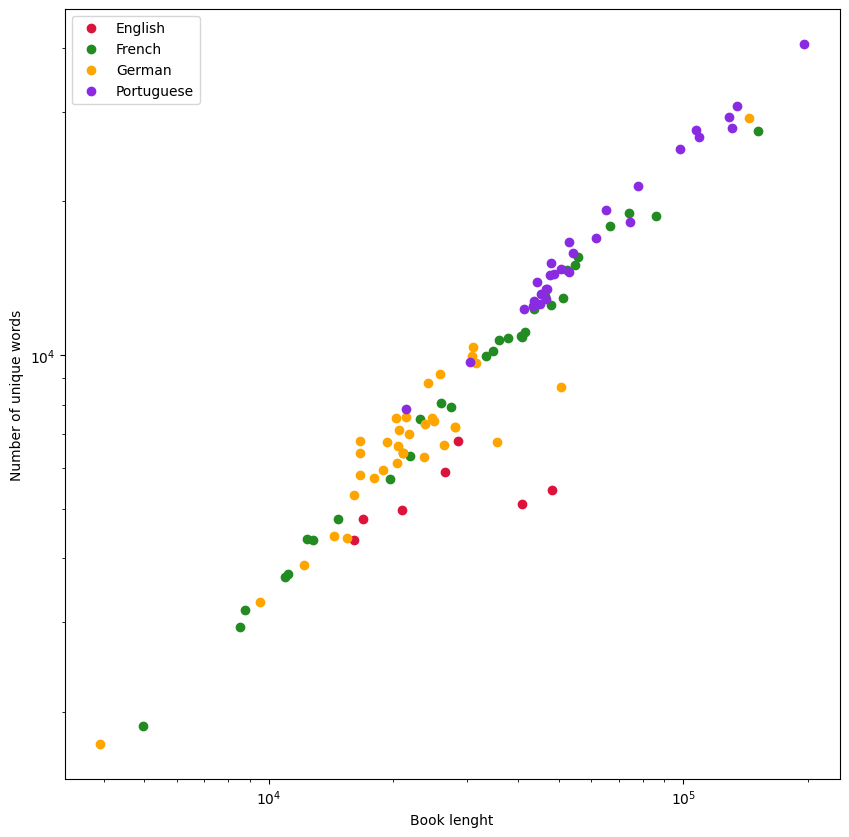

In [18]:
plt.figure(figsize=(10, 10))
subset = stats[stats.language == "English"]
plt.loglog(subset.length, subset.unique, "o", label = "English", color = "crimson")
subset = stats[stats.language == "French"]
plt.loglog(subset.length, subset.unique, "o", label = "French", color = "forestgreen")
subset = stats[stats.language == "German"]
plt.loglog(subset.length, subset.unique, "o", label = "German", color = "orange")
subset = stats[stats.language == "Portuguese"]
plt.loglog(subset.length, subset.unique, "o", label = "Portuguese", color = "blueviolet")
plt.legend()
plt.xlabel("Book lenght")
plt.ylabel("Number of unique words");
